# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [4]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()[0]  # mode() devuelve una serie, por eso usamos [0]

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)


Media: 15.481103166496425
Mediana: 14.0
Moda: 12


In [5]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion_std = df['title_length'].std()

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion_std)


Rango: 67
Varianza: 72.1067488840288
Desviación estándar: 8.491569282766807


In [6]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df['title_length'])
curtosis_ = kurtosis(df['title_length'])

print("Asimetría:", asimetria)
print("Curtosis:", curtosis_)

Asimetría: 1.5229143965677572
Curtosis: 3.7867237597626007


In [7]:
# Imprime el título más corto y el título más largo según su longitud
titulo_mas_corto = df.loc[df['title_length'].idxmin(), 'title']
titulo_mas_largo = df.loc[df['title_length'].idxmax(), 'title']

print("Título más corto:", titulo_mas_corto)
print("Título más largo:", titulo_mas_largo)


Título más corto: M
Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


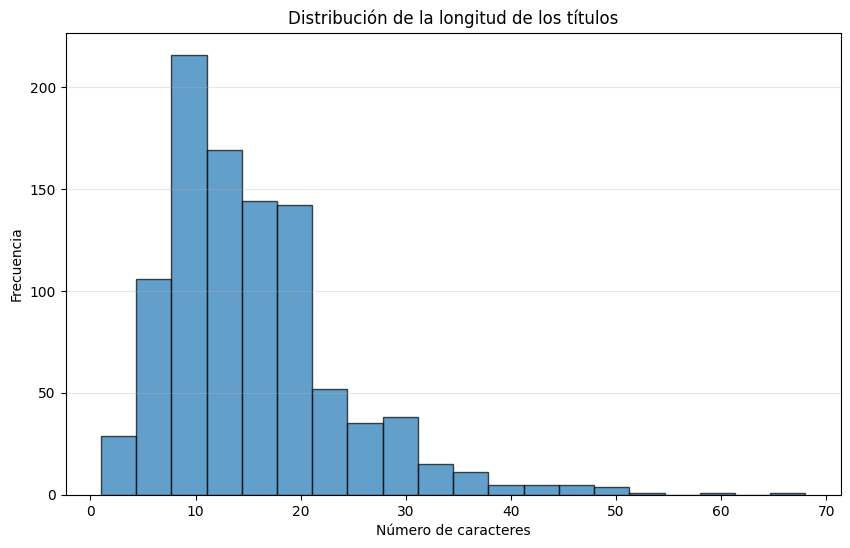

In [8]:
# grafica tus resultados
plt.figure(figsize=(10,6))
plt.hist(df['title_length'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de la longitud de los títulos')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [9]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
valores = df['title_length'].head(5).tolist()
print(valores)

[24, 13, 22, 15, 12]


In [11]:
# Calcula la media de los 5 valores
print(sum(valores)/len(valores))

17.2


In [ ]:
# Calcula las diferencias al cuadrado con respecto a la media
valores = np.array(valores)
diferencias_cuadrado = (valores - media) ** 2
print("Diferencias al cuadrado:", diferencias_cuadrado)

Diferencias al cuadrado: [72.57160326  6.15587292 42.49601593  0.23146026 12.11807926]


In [ ]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = np.var(valores)          # por defecto divide entre n
desviacion = np.std(valores)        # raíz cuadrada de la varianza

print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Varianza: 23.76
Desviación estándar: 4.874423042781577
